In [ ]:
#Linear Regression on Weather Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [3]:
# Load Dataset
dataset = pd.read_csv('Weather.csv')
dataset.shape

(119040, 31)

The shape of the dataset is (119040,31)
i.e. 119040 is number of rows (data sample) and 31 is number of column (features)

In [16]:
#Describe dataset
dataset.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


Lets plot 2D graph of the data to find the relation betwwen dataset

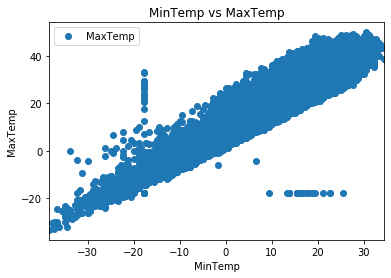

In [18]:
dataset.plot(x='MinTemp',y='MaxTemp',style='o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

Let’s check the average max temperature and once we plot it we can observe that the Average Maximum Temperature is Between Nearly 25 and 35.

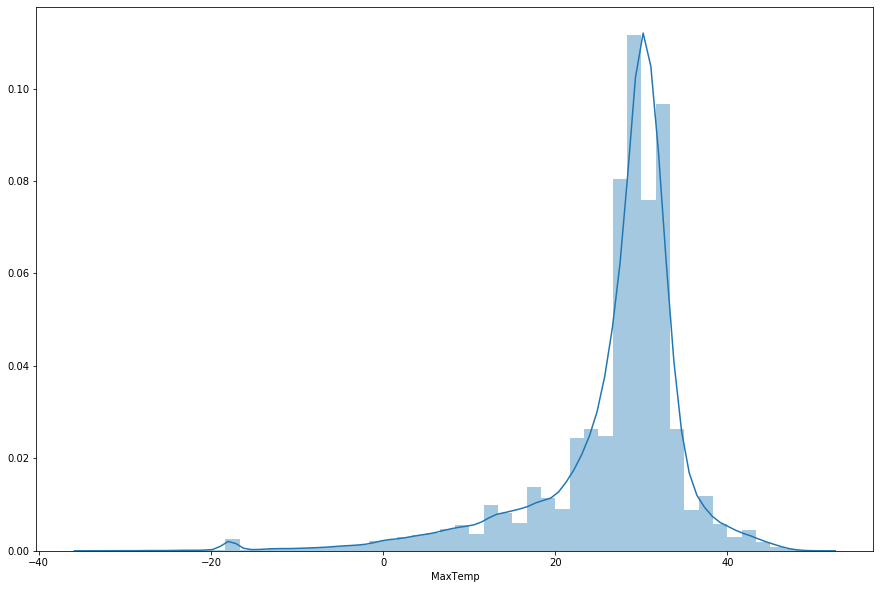

In [21]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sb.distplot(dataset['MaxTemp'])

Our next step is to divide the data into “attributes” and “labels”.
Attributes are the independent variables while labels are dependent variables whose values are to be predicted. In our dataset, we only have two columns. We want to predict the MaxTemp depending upon the MinTemp recorded. Therefore our attribute set will consist of the “MinTemp” column which is stored in the X variable, and the label will be the “MaxTemp” column which is stored in y variable.

In [28]:
x = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)
#print(x)

Next, we split 80% of the data to the training set while 20% of the data to test set using below code.

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
regressor = LinearRegression()
a = regressor.fit(x_train,y_train)

As we have discussed that the linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. To see the value of the intercept and slope calculated by the linear regression algorithm for our dataset, execute the following code.

In [36]:
print("Intercept:")
print(regressor.intercept_)
print("Coef:")
print(regressor.coef_)

Intercept:
[10.66185201]
Coef:
[[0.92033997]]


This means that for every one unit of change in Min temperature, the change in the Max temperature is about 0.92%.

Now that we have trained our algorithm, it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score. To make predictions on the test data, execute the following script:

In [37]:
y_pred = regressor.predict(x_test)
print(y_pred)

[[33.67035117]
 [30.0912513 ]
 [26.51215143]
 ...
 [32.64775121]
 [30.60255128]
 [31.62515124]]


In [39]:
df = pd.DataFrame({"Actual Value": y_test.flatten(),
                  "Predicted Value": y_pred.flatten()})
print(df.head(20))

    Actual Value  Predicted Value
0      28.888889        33.670351
1      31.111111        30.091251
2      27.222222        26.512151
3      28.888889        31.113851
4      23.333333        15.774852
5      37.222222        30.602551
6      22.222222        11.684452
7      35.555556        33.670351
8      30.555556        30.602551
9      28.888889        32.647751
10     24.444444        29.068651
11     22.777778        23.955652
12     30.555556        30.091251
13     26.111111        26.000851
14     27.222222        29.068651
15     30.555556        32.647751
16     10.555556        15.774852
17     32.222222        32.136451
18     29.444444        29.579951
19     23.333333        18.842652


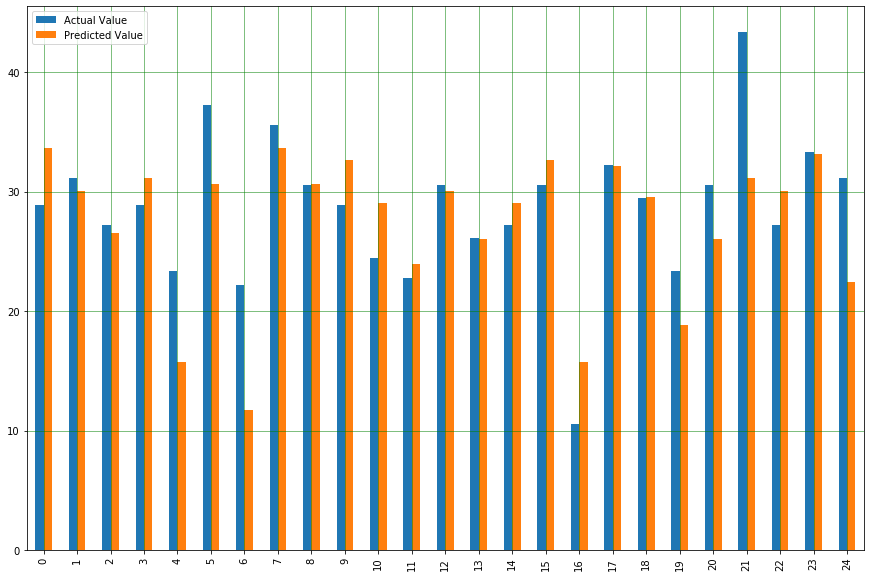

In [43]:
#Lets visualize the difference between original and predicted value
df1 =df.head(25) #Taking 25 row for visualization
df1.plot(kind='bar',figsize=(15,10))
plt.grid(which='major',linestyle='-',linewidth=0.5,color='green')
plt.grid(which='minor',linestyle=':',linewidth=0.5,color='black')
plt.show()

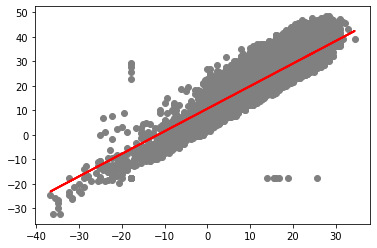

In [44]:
#Let's plot our straight line with the test data :
plt.scatter(x_test,y_test,color='gray')
plt.plot(x_test,y_pred,color='red',linewidth=2)
plt.show()

The straight line in the above graph shows our algorithm is correct.
The final step is to evaluate the performance of the algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.
For regression algorithms, three evaluation metrics are commonly used:
Mean Absolute Error (MAE) is the mean of the absolute value of the errors. It is calculated as:

Mean Absolute Error
2. Mean Squared Error (MSE) is the mean of the squared errors and is calculated as:

Mean Squared Error
3. Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

Root Mean Squared Error
Luckily, we don’t have to perform these calculations manually. The Scikit-Learn library comes with pre-built functions that can be used to find out these values for us.
Let’s find the values for these metrics using our test data.


In [72]:
print("Mean Absolute Error: "  + str(metrics.mean_absolute_error(y_test,y_pred)))
print("Mean squared Error: "  + str(metrics.mean_squared_error(y_test,y_pred)))
print("Root Mean Squared Error: "  + str(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))

Mean Absolute Error: 3.19932917837853
Mean squared Error: 17.631568097568447
Root Mean Squared Error: 4.198996082109204


You can see that the value of root mean squared error is 4.19, which is more than 10% of the mean value of the percentages of all the temperature i.e. 22.41. This means that our algorithm was not very accurate but can still make reasonably good predictions.